# Тема «Создание признакового пространства»

In [67]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

1. Создайте мешок слов с помощью
sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed'
и 'tweet_lemmatized' отдельно.
* Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
* Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
* Исключим стоп-слова с помощью stop_words='english'.
* Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с
помощью CountVectorizer.get_feature_names().

In [68]:
df = pd.read_pickle('../lesson1/result.pkl')
df

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunct, selfish, drag, kid, dysfunc..."
1,2,0.0,thanks for lyft credit can use cause they don ...,"[thanks, for, lyft, credit, can, use, cause, t...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thank, lyft, credit, use, caus, offer, wheelc..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesti]"
3,4,0.0,model love you take with you all the time in y...,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time]","[model, love, take, time]","[model, love, take, time]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguid, societi, motiv]"
...,...,...,...,...,...,...,...
17192,49155,NaN,thought factory left right polarisation trump ...,"[thought, factory, left, right, polarisation, ...","[thought, factory, left, right, polarisation, ...","[thought, factori, left, right, polaris, trump...","[thought, factori, left, right, polaris, trump..."
17193,49156,NaN,feeling like mermaid hairflip neverready forma...,"[feeling, like, mermaid, hairflip, neverready,...","[feeling, like, mermaid, hairflip, neverready,...","[feel, like, mermaid, hairflip, neverreadi, fo...","[feel, like, mermaid, hairflip, neverreadi, fo..."
17194,49157,NaN,hillary campaigned today in ohio oh my god amp...,"[hillary, campaigned, today, in, ohio, oh, my,...","[hillary, campaigned, today, ohio, oh, god, am...","[hillari, campaign, today, ohio, oh, god, amp,...","[hillari, campaign, today, ohio, oh, god, amp,..."
17195,49158,NaN,happy at work conference right mindset leads t...,"[happy, at, work, conference, right, mindset, ...","[happy, work, conference, right, mindset, lead...","[happi, work, confer, right, mindset, lead, cu...","[happi, work, confer, right, mindset, lead, cu..."


In [69]:
count_vectorizer = CountVectorizer(max_df=.9, max_features = 1000, stop_words='english')

In [70]:
# tweet_stemmed
tweet_stemmed_bag = count_vectorizer.fit_transform([' '.join(sublist) for sublist in df['tweet_stemmed'].to_list()])
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(tweet_stemmed_bag.toarray(), columns = feature_names)

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# tweet_lemmatized
tweet_lemmatized_bag = count_vectorizer.fit_transform([' '.join(sublist) for sublist in df['tweet_lemmatized'].to_list()])
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(tweet_lemmatized_bag.toarray(), columns = feature_names)

,abl,absolut,accept,account,act,action,activ,actor,actual,ad,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. Создайте мешок слов с помощью
sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и
'tweet_lemmatized' отдельно.
* Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
* Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
* Исключим стоп-слова с помощью stop_words='english'.
* Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().

In [72]:
tfidf_vectorizer = TfidfVectorizer(max_df=.9, max_features = 1000, stop_words='english')

In [73]:
# tweet_stemmed
tweet_stemmed_bag = tfidf_vectorizer.fit_transform([' '.join(sublist) for sublist in df['tweet_stemmed'].to_list()])
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(tweet_stemmed_bag.toarray(), columns = feature_names)

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# tweet_lemmatized
tweet_lemmatized_bag = tfidf_vectorizer.fit_transform([' '.join(sublist) for sublist in df['tweet_lemmatized'].to_list()])
feature_names = tfidf_vectorizer.get_feature_names()
aa = pd.DataFrame(tweet_lemmatized_bag.toarray(), columns = feature_names)

3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы

In [75]:
# Делаем формат датафрейма как в семинаре
ml_df = df.copy()
ml_df['tweet_stemmed'] = ml_df.apply(lambda x: ' '.join(x['tweet_stemmed']), axis= 1)
ml_df['tweet_lemmatized'] = ml_df.apply(lambda x: ' '.join(x['tweet_lemmatized']), axis= 1)

train_df = ml_df[ml_df['label'].notna()]
test_df = ml_df[ml_df['label'].isna()]

print(train_df.shape)
print(test_df.shape)

(31962, 7)
(17197, 7)


In [76]:
preds = {
    'tweet_stemmed': {'count_vectorizer': '', 'tfidf_vectorizer': ''},
    'tweet_lemmatized': {'count_vectorizer': '', 'tfidf_vectorizer': ''}
}

results = {
    'tweet_stemmed': {'count_vectorizer': '', 'tfidf_vectorizer': ''},
    'tweet_lemmatized': {'count_vectorizer': '', 'tfidf_vectorizer': ''}
}

In [77]:
from sklearn import model_selection, preprocessing, linear_model
from sklearn.metrics import accuracy_score

In [78]:
total = {}
total['count_vectorizer'] = {}
total['tfidf_vectorizer'] = {}

for max_feats in [5,10,50,100,500,1000,2000,5000,10000]:
    count_vectorizer = CountVectorizer(max_df=.9, max_features = max_feats, stop_words='english')
    tfidf_vectorizer = TfidfVectorizer(max_df=.9, max_features = max_feats, stop_words='english')

    for column in ['tweet_stemmed', 'tweet_lemmatized']:
        train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train_df[column], train_df['label'])
        encoder = preprocessing.LabelEncoder()
        train_y = encoder.fit_transform(train_y)
        valid_y = encoder.fit_transform(valid_y)

        for vect in ['count_vectorizer', 'tfidf_vectorizer']:
            if vect == 'count_vectorizer':
                vectorizer = count_vectorizer
            elif vect == 'tfidf_vectorizer':
                vectorizer = tfidf_vectorizer
            vectorizer.fit(train_df[column])

            xtrain =  vectorizer.transform(train_x)
            xvalid =  vectorizer.transform(valid_x)
            classifier = linear_model.LogisticRegression()
            classifier.fit(xtrain, train_y)
            predictions = classifier.predict(xvalid)
            preds[column][vect] = predictions
            score = accuracy_score(valid_y, predictions)
            results[column][vect] = score
            total[vect][max_feats] = score
            
    print(f'\n max_features = {max_feats}')
    print(f'{pd.DataFrame(results)}\n')


 max_features = 5
                  tweet_stemmed  tweet_lemmatized
count_vectorizer        0.92867          0.930547
tfidf_vectorizer        0.92917          0.930547


 max_features = 10
                  tweet_stemmed  tweet_lemmatized
count_vectorizer       0.926042          0.928795
tfidf_vectorizer       0.926417          0.928795


 max_features = 50
                  tweet_stemmed  tweet_lemmatized
count_vectorizer       0.930046          0.929546
tfidf_vectorizer       0.930422          0.930046


 max_features = 100
                  tweet_stemmed  tweet_lemmatized
count_vectorizer       0.929045          0.929045
tfidf_vectorizer       0.929295          0.928545


 max_features = 500
                  tweet_stemmed  tweet_lemmatized
count_vectorizer       0.940433          0.947441
tfidf_vectorizer       0.942560          0.946940


 max_features = 1000
                  tweet_stemmed  tweet_lemmatized
count_vectorizer       0.949443          0.950444
tfidf_vectorizer      

In [79]:
import matplotlib.pyplot as plt

In [80]:
pd.DataFrame(total)

,count_vectorizer,tfidf_vectorizer
5,0.930547,0.930547
10,0.928795,0.928795
50,0.929546,0.930046
100,0.929045,0.928545
500,0.947441,0.946940
1000,0.950444,0.950945
2000,0.950695,0.949318
5000,0.959580,0.951070
10000,0.962458,0.952947


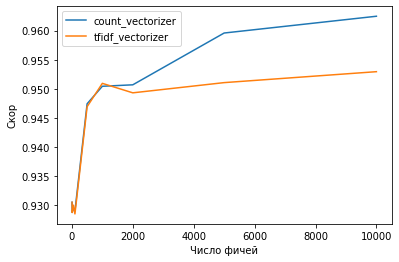

In [93]:
plt.plot(pd.DataFrame(total), label=pd.DataFrame(total).columns.to_list())
plt.xlabel('Число фичей')
plt.ylabel('Скор')
plt.legend()
plt.show()

Наблюдение: какие-то очень высокие скоры везде. Вероятно из-за несбалансированных классов